<a href="https://colab.research.google.com/github/feliperafaelbarbosa/global-terror-predictor/blob/main/global_terror_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Classificação Precisa de Incidentes Terroristas: Identificando Padrões e Fatores de Risco

## 1.1 Sobre o Projeto

O projeto utiliza o Global Terrorism Database (GTD), acessível através do link: [Global Terroism Database](https://www.start.umd.edu/gtd/).

Este conjunto de dados contém informações sobre incidentes terroristas em todo o mundo desde 1970. Ele inclui características detalhadas como data, localização, grupo responsável, tipo de ataque, arma utilizada, entre outros. A base é extremamente rica, com mais de 200 mil registros e mais de 100 features, sendo uma excelente fonte para análise preditiva e classificação.

O objetivo deste projeto é desenvolver um sistema de classificação para identificar incidentes terroristas com base em características específicas, utilizando técnicas de machine learning para reconhecer padrões nos dados históricos.

![image.png](https://www.start.umd.edu/gtd/images/START_GTD-Heatmap_2020.jpg)

## 1.2 Sobre a Base de Dados

**Global Terrorism Database (GTD)**

Este conjunto de dados contém mais de 200.000 incidentes, com informações detalhadas sobre o contexto do ataque, como a localização, o tipo de arma, o método do ataque, as vítimas, e os grupos terroristas envolvidos.

**Problema:** O projeto visa prever o tipo de ataque e identificar o grupo responsável, utilizando características como a localização, a arma utilizada e a data do incidente.

**Features a serem utilizadas:** Localização geográfica (latitude e longitude), data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável. [Detalhes das Features](https://www.start.umd.edu/gtd/downloads/Codebook.pdf).



## 1.3 Explicando o Projeto

O projeto aborda a necessidade de prever e classificar incidentes terroristas com base em padrões históricos. Compreender os fatores que influenciam um ataque pode ajudar na alocação de recursos de segurança, antecipando possíveis ameaças.

A base de dados GTD oferece uma ampla gama de atributos que permitem identificar características recorrentes em ataques específicos. O objetivo é criar um modelo preditivo capaz de classificar novos incidentes terroristas com base em dados de eventos passados, utilizando técnicas como redes neurais, árvores de decisão ou ensemble learning.

O foco é em maximizar a precisão e minimizar falsos positivos, garantindo que o modelo seja útil para os responsáveis pela segurança pública e política de defesa.

## 1.4 Proposta

---

**Problema:** Como identificar padrões em ataques terroristas com base em dados históricos para prever o tipo de ataque e o grupo responsável?

**Features a serem utilizadas:** Localização, data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável.

**A pergunta a ser respondida é:** Quais fatores influenciam o tipo de ataque e o grupo responsável por ele, e como podemos usar essas informações para prever futuros ataques com alta precisão?

# 2 - Metodologia CRISP-DM

CRISP-DM é um framework amplamente utilizado para Mineração de Dados que descreve uma abordagem estruturada para, planejamento, execução e avaliação da mineração de dados dos projetos. Esse framework fornece um passo a passo de processos que podem ser adaptados para várias áreas de negócio e tecnicas de mineração de dados, tornando-se uma ferramenta valiosa, para iniciantes e profissionais experientes.

Texto adaptado de: https://medium.com/@avikumart_/crisp-dm-framework-a-foundational-data-mining-process-model-86fe642da18c

---

![image](https://github.com/user-attachments/assets/c92378ce-ff8c-41a4-874d-1d623987c7e4)

Imagem retirada do slide: https://s2.smu.edu/~mhd/8331f03/crisp.pdf

## 2.1 Compreensão do Negócio

- **Objetivo:** Identificar o problema de segurança pública relacionado a ataques terroristas, visando prever o tipo de ataque e identificar padrões em grupos terroristas.

- **Tarefas**:
    - Compreender a importância da previsão de ataques para a segurança global.
    - Definir métricas, como precisão, recall e taxa de falsos positivos/negativos.

## 2.2 Entendimento dos Dados

- Objetivo: Coletar e entender as características dos dados do GTD.

- Tarefas:
    - Explorar o conjunto de dados GTD para identificar padrões e atributos relevantes.
    - Analisar a distribuição de atributos como localização, tipo de ataque e grupo responsável.

## 2.3 Preparação dos Dados

- Objetivo: Preparar os dados para a modelagem.

- Tarefas:
    - Limpar dados inconsistentes ou ausentes.
    - Realizar transformações de atributos, como converter datas e localizações em features relevantes.
    - Dividir os dados em conjuntos de treinamento, validação e teste.


## 2.4 Modelagem

- Objetivo: Desenvolver modelos preditivos utilizando algoritmos de machine learning.
- Tarefas:
    - Aplicar algoritmos de classificação (ex.: Random Forest, Redes Neurais, XGBoost) para prever o tipo de ataque.
    - Ajustar hiperparâmetros e comparar modelos para otimizar a performance.

## 2.5 Avaliação

- Objetivo: Avaliar a performance dos modelos utilizando métricas de classificação.
- Tarefas:
    - Avaliar precisão, recall, F1-score e ROC-AUC.
    - Comparar os resultados dos diferentes modelos e ajustar conforme necessário.

## 2.6 Implementação

- Objetivo: Implementar o modelo preditivo para uso prático.
- Tarefas:
    - Desenvolver um pipeline para classificar novos incidentes com base nos dados do GTD.
    - Documentar o processo e fornecer insights sobre possíveis melhorias.

# 3 - Execução do Projeto

## 3.1 Carregamento de Dependências e da Base de Dados

In [1]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install scikit-learn
!pip install geopandas
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

from matplotlib import pyplot as plt
from shapely.geometry import Point

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel('/content/drive/MyDrive/databases/globalterrorismdb_0522dist.xlsx',
                     sheet_name='Data')

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
print(f'{data.shape[0]} Instances.', end='\n')
print(f'{data.shape[1]} Features.')

209706 Instances.
135 Features.


In [7]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 729.8 MB


In [8]:
data.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,4861,209706.000000,209706.000000,205015.000000,205014.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,2006-12-14 11:22:40.581978880,130.291351,7.279854,23.358696,30.416738,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-176.176447,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,1997-05-22 00:00:00,69.000000,6.000000,11.510046,8.748117,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,2013-04-29 00:00:00,98.000000,8.000000,31.300213,43.746215,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,2016-05-10 00:00:00,160.000000,10.000000,34.557022,68.835918,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,2021-05-29 00:00:00,1004.000000,12.000000,74.633553,179.366667,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,NaN,111.714562,2.905697,18.137061,56.113029,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966


## 3.2 Análise Exploratória

In [9]:
attack_per_year = data.groupby('iyear').size()
attack_per_year

,0
iyear,
1970,651
1971,471
1972,567
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


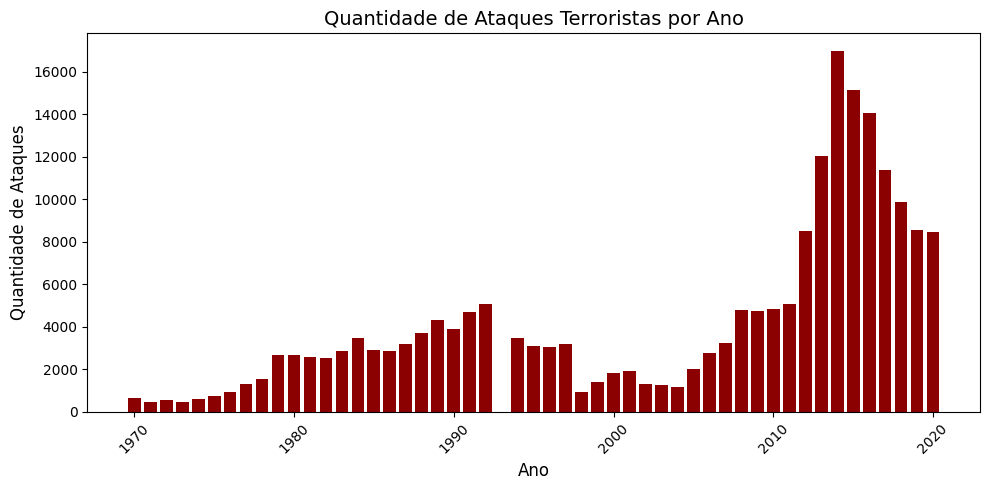

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(attack_per_year.index, attack_per_year.values, color='darkred')
plt.title('Quantidade de Ataques Terroristas por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Ataques', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_filtered = data[data['gname'] != 'Unknown']

# Contar o número de ataques por grupo terrorista
group_attacks = df_filtered['gname'].value_counts()

# Selecionar os top 10 grupos com mais ataques para visualização
top_10_groups = group_attacks.head(10)

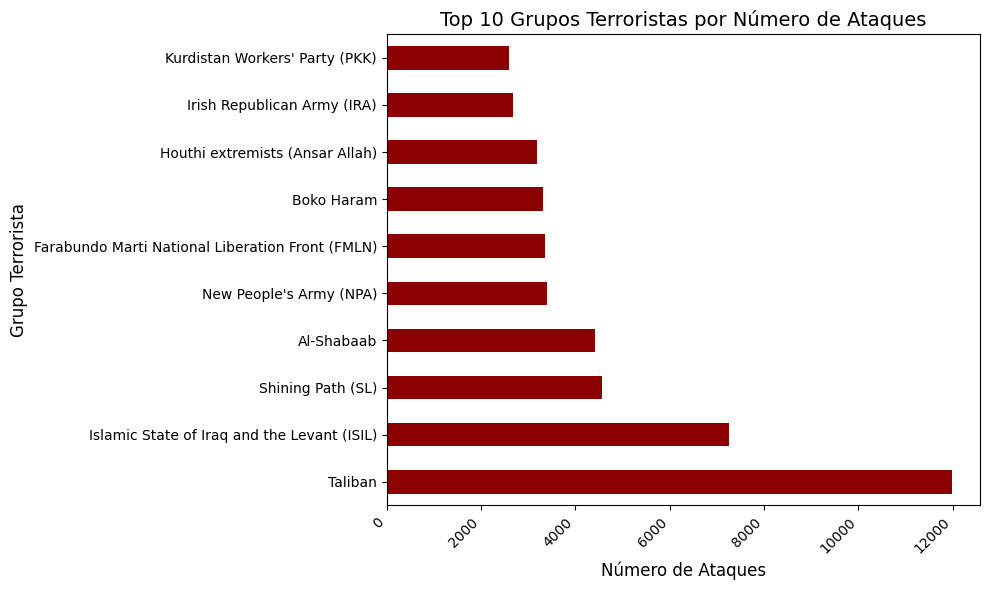

In [12]:
plt.figure(figsize=(10, 6))
top_10_groups.plot(kind='barh', color='darkred')
plt.title('Top 10 Grupos Terroristas por Número de Ataques', fontsize=14)
plt.xlabel('Número de Ataques', fontsize=12)
plt.ylabel('Grupo Terrorista', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

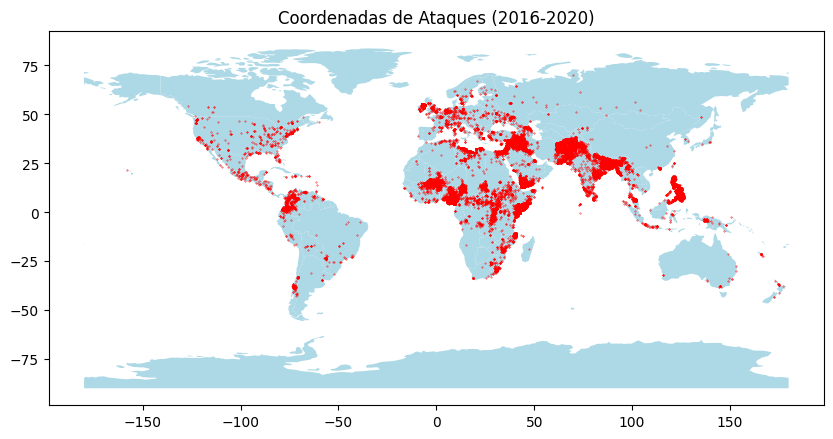

In [13]:
# Filtrar dados para os anos de 2016 a 2020
data_filtered = data[(data['iyear'] >= 2016) & (data['iyear'] <= 2020)]

# Criar uma coluna de geometria de pontos
geometry = [Point(xy) for xy in zip(data_filtered['longitude'], data_filtered['latitude'])]
gdf = gpd.GeoDataFrame(data_filtered, geometry=geometry)

# Carregar o shapefile
shapefile_path = '/content/drive/MyDrive/Colab Notebooks/contries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Plotar o mapa e os pontos
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightblue')  # Mapa base
gdf.plot(ax=ax, color='red', marker='o', markersize=0.1)  # Pontos

plt.title('Coordenadas de Ataques (2016-2020)')
plt.show()

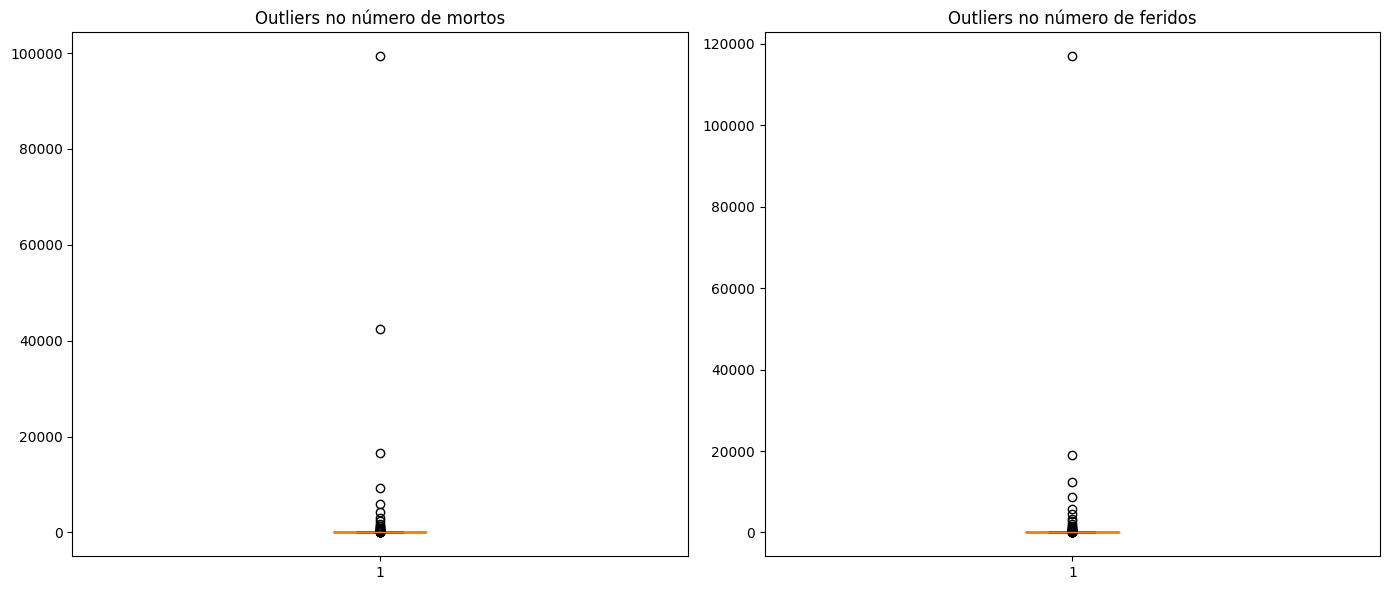

In [14]:
# Contar a frequência de mortes e feridos
nkill_count = data['nkill'].value_counts()
nwound_count = data['nwound'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotar o gráfico de outliers para o número de mortos
axes[0].boxplot(nkill_count)
axes[0].set_title('Outliers no número de mortos')

# Plotar o gráfico de outliers para o número de feridos
axes[1].boxplot(nwound_count)
axes[1].set_title('Outliers no número de feridos')

plt.tight_layout()
plt.show()

Em dados de ataques terroristas, eventos extremos (como um ataque com muitas mortes ou feridos) podem ser reais e relevantes. Esses valores, apesar de parecerem outliers, podem refletir a realidade e não devem ser removidos ou ajustados.


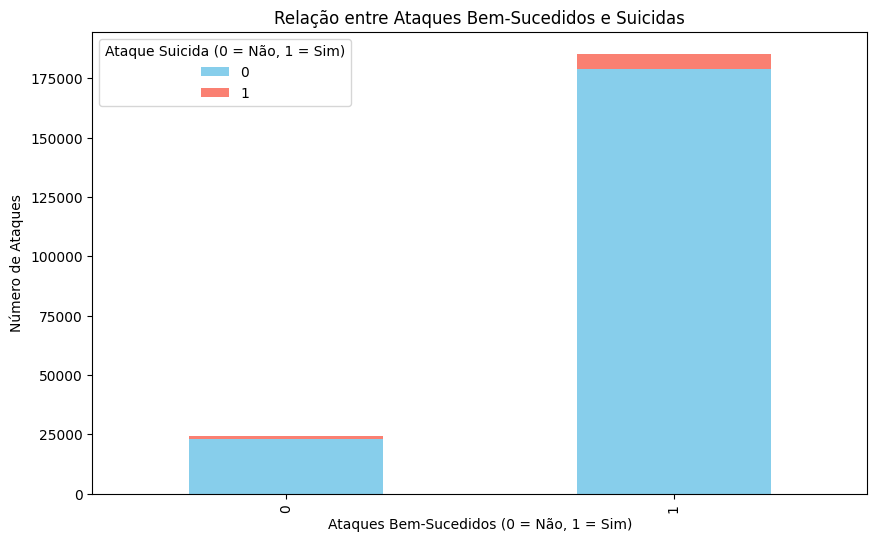

In [15]:
success_suicide_counts = data.groupby(['success', 'suicide']).size().unstack()

# Criar o gráfico de barras para 'success' vs 'suicide'
success_suicide_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Relação entre Ataques Bem-Sucedidos e Suicidas')
plt.xlabel('Ataques Bem-Sucedidos (0 = Não, 1 = Sim)')
plt.ylabel('Número de Ataques')
plt.legend(title='Ataque Suicida (0 = Não, 1 = Sim)')

plt.show()

## 3.3 Preparação dos Dados

In [16]:
selected_columns = [
    'iyear', 'imonth', 'iday',               # Data do ataque
    'country', 'region', 'provstate', 'city',  # Localização
    'latitude', 'longitude',                # Coordenadas
    'attacktype1', 'attacktype2', 'attacktype3', # Tipos de ataque
    'targtype1', 'targsubtype1', 'targtype2', 'targtype3', # Tipos de alvo
    'success', 'suicide',                   # Sucesso e se foi suicida
    'weaptype1', 'weaptype2', 'weaptype3', 'weaptype4', # Tipos de arma
    'property',                             # Dano à propriedade
    'claimed', 'claimmode',                 # Se foi reivindicado e modo
    'motive',                                # Motivo do ataque, se disponível
    'gname'
]

chunk_size = 25000

In [17]:
data = pd.read_excel('/content/drive/MyDrive/databases/globalterrorismdb_0522dist.xlsx',
                     sheet_name='Data', usecols=selected_columns, nrows=chunk_size)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1. A estratégia consistiu em manter "Unknown" como uma Classe Separada
Se a ausência de informações sobre o grupo responsável pode ser considerada uma característica relevante (por exemplo, para prever se o ataque foi realizado por um grupo conhecido ou não), a melhor opção foi manter o "Unknown" como uma classe separada. Isso permite que os modelos considerem essa categoria como uma possível previsão.

In [19]:
# Manter "Unknown" como uma categoria válida
le = LabelEncoder()
data['gname_encoded'] = le.fit_transform(data['gname'])

In [20]:
# Selecionar apenas colunas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [21]:
# Preencher valores ausentes com a mediana apenas nas colunas numéricas
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [22]:
# preencher valores ausentes com a moda para colunas categóricas
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-22-90037fdf3afd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [23]:
data

,iyear,imonth,iday,country,region,provstate,city,latitude,longitude,success,...,gname,motive,claimed,claimmode,weaptype1,weaptype2,weaptype3,weaptype4,property,gname_encoded
0,1970,7,2,58,2,National,Santo Domingo,18.456792,-69.951164,1,...,MANO-D,Unknown,0.0,5.0,13,6.0,6.0,6.0,0,582
1,1970,0,0,130,1,Federal,Mexico city,19.371887,-99.086624,1,...,23rd of September Communist League,Unknown,0.0,5.0,13,6.0,6.0,6.0,0,4
2,1970,1,0,160,5,Tarlac,Unknown,15.478598,120.599741,1,...,Unknown,Unknown,0.0,5.0,13,6.0,6.0,6.0,0,1068
3,1970,1,0,78,8,Attica,Athens,37.997490,23.762728,1,...,Unknown,Unknown,0.0,5.0,6,6.0,6.0,6.0,1,1068
4,1970,1,0,101,4,Fukouka,Fukouka,33.580412,130.396361,1,...,Unknown,Unknown,0.0,5.0,8,6.0,6.0,6.0,1,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1985,5,8,61,2,San Miguel,San Miguel,13.491242,-88.173134,1,...,Farabundo Marti National Liberation Front (FMLN),Unknown,0.0,5.0,6,6.0,6.0,6.0,1,374
24996,1985,5,8,61,2,San Miguel,San Miguel,13.491242,-88.173134,1,...,Farabundo Marti National Liberation Front (FMLN),Unknown,0.0,5.0,6,6.0,6.0,6.0,1,374
24997,1985,5,8,61,2,San Miguel,San Miguel,13.491242,-88.173134,1,...,Farabundo Marti National Liberation Front (FMLN),Unknown,0.0,5.0,6,6.0,6.0,6.0,1,374
24998,1985,5,8,61,2,San Miguel,San Miguel,13.491242,-88.173134,1,...,Farabundo Marti National Liberation Front (FMLN),Unknown,0.0,5.0,6,6.0,6.0,6.0,1,374


In [24]:
# Codificar a variável alvo 'gname'
le = LabelEncoder()
data['gname_encoded'] = le.fit_transform(data['gname'])

# One-Hot Encoding para as variáveis categóricas restantes
data = pd.get_dummies(data, drop_first=True)

In [25]:
# Normalizar os dados numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['gname_encoded']))

In [26]:
# Definir X e y
X = data.drop(columns=['gname_encoded'])
y = data['gname_encoded']

# Contar a quantidade de instâncias em cada classe
class_counts = y.value_counts()

# Filtrar as classes com mais de uma instância
valid_classes = class_counts[class_counts > 1].index

# Manter apenas as linhas cujas classes tenham mais de uma instância
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

In [27]:
# Dividir em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
# Exibir as formas dos conjuntos de dados
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de treino: (17116, 6894)
Tamanho do conjunto de teste: (7336, 6894)


## 3.4 Modelagem


### 3.4.1 Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.4.2 Rede Neural

In [30]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3590 - loss: 4.3141 - val_accuracy: 0.4103 - val_loss: 2.7938
Epoch 2/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4863 - loss: 2.5150 - val_accuracy: 0.5312 - val_loss: 2.2739
Epoch 3/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5669 - loss: 2.0358 - val_accuracy: 0.6305 - val_loss: 1.8457
Epoch 4/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6472 - loss: 1.6384 - val_accuracy: 0.6779 - val_loss: 1.6103
Epoch 5/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6969 - loss: 1.4050 - val_accuracy: 0.7526 - val_loss: 1.4170
Epoch 6/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7361 - loss: 1.2314 - val_accuracy: 0.7544 - val_loss: 1.3044
Epoch 7/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7691 - loss: 1.0889 - val_accuracy: 0.7815 - val_loss: 1.2341
Epoch 8/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7984 - loss: 0.9566 - val

## 3.5 Avaliação

### 3.5.1 Acurácia, Precisão, Recall e F1-Score

In [31]:
# Random Forest
y_pred_rf = rf.predict(X_test)

# Rede Neural
y_pred_nn_probs = model.predict(X_test)
#y_pred_nn = (y_pred_nn_probs > 0.5).astype("int32")  # Para classificação binária
# Para classificação multiclasse, use `argmax`:
y_pred_nn = y_pred_nn_probs.argmax(axis=-1)

# Métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Métricas para Rede Neural
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [32]:
print("Random Forest - Acurácia: {:.2f}, Precisão: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(
    accuracy_rf, precision_rf, recall_rf, f1_rf))
print("Rede Neural - Acurácia: {:.2f}, Precisão: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(
    accuracy_nn, precision_nn, recall_nn, f1_nn))

Random Forest - Acurácia: 0.97, Precisão: 0.95, Recall: 0.97, F1-Score: 0.95
Rede Neural - Acurácia: 0.91, Precisão: 0.89, Recall: 0.91, F1-Score: 0.89


In [37]:
from sklearn.metrics import roc_curve, auc

# Random Forest

y_prob_rf = rf.predict_proba(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

### 3.5.2 Matrix de Confusão

In [33]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'rf_model' is not defined